In [1]:
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
from IPython.display import HTML
from qwanta import Experiment
import matplotlib
import seaborn as sns

In [2]:
## Architype 2

def time_to_coordinate(t):
    return (50*np.sin((7/50)*t) + 100,0,0) #(90 + 7*t,0,0)

def time_to_coordinate_inv(t):
    return (-1*50*np.sin((7/50)*t) + 100,0,0)

def distance_to_prob(distance, time):
    p = [1, 0, 0, 0]
    return p

node_number = 3
n_hops = [2]
nodes_name = [f'Node {i}' for i in range(node_number)]
distance_btw = 100 # km
#nodes_coordinate = [(0, 0), (1000, 0), (2200, 0), (3600, 0), (5200, 0)]
edges_loss = [0.1]*(node_number-1) # dB/km

nodes_info_exp = [{
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': (100, 0, 0)},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 20,
            'numInternalEncodingBuffer': 20,
            'numInternalDetectingBuffer': 10,
            'numInternalInterfaceBuffer': 2,
        },
        {
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': (50, 0, 0)},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 20,
            'numInternalEncodingBuffer': 20,
            'numInternalDetectingBuffer': 10,
            'numInternalInterfaceBuffer': 2,
        },
        {  
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': time_to_coordinate},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 20,
            'numInternalEncodingBuffer': 20,
            'numInternalDetectingBuffer': 10,
            'numInternalInterfaceBuffer': 2,
        },
        {  
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': time_to_coordinate},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 40,
            'numInternalEncodingBuffer': 40,
            'numInternalDetectingBuffer': 20,
            'numInternalInterfaceBuffer': 2,
        },
        {  
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': time_to_coordinate_inv},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 20,
            'numInternalEncodingBuffer': 20,
            'numInternalDetectingBuffer': 10,
            'numInternalInterfaceBuffer': 2,
        },
]
edges_info_exp = [
    {
        ('Node 0', 'Node 1'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': 0.1,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        },
        ('Node 1', 'Node 2'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': 0.1,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        }
    }
for _ in nodes_info_exp]

e_tl, vis_a = Experiment.read_timeline_from_csv(f'exper_ID9_2hops_1setup_ArcType2.xlsx', excel=True) # exper_id7_Logical_{i}hops.xlsx
e_tl_2, vis_b = Experiment.read_timeline_from_csv(f'exper_ID9_2hops_2setup_ArcType2.xlsx', excel=True) # exper_id7_Logical_{i}hops.xlsx

timelines = {'ID9-StaticMiddleLink': e_tl, 'ID9-StaticBiasLeftLink': e_tl,'ID9-DynamicMiddleLink': e_tl,'ID9-DynamicMiddleLinkDouble': e_tl_2,'ID9-DynamicMiddleLink-inverseDirection': e_tl}
nodes_information = {'ID9-StaticMiddleLink': nodes_info_exp[0], 'ID9-StaticBiasLeftLink': nodes_info_exp[1],'ID9-DynamicMiddleLink': nodes_info_exp[2],'ID9-DynamicMiddleLinkDouble': nodes_info_exp[3],'ID9-DynamicMiddleLink-inverseDirection': nodes_info_exp[4]}
networks = {'ID9-StaticMiddleLink': edges_info_exp[0], 'ID9-StaticBiasLeftLink': edges_info_exp[1],'ID9-DynamicMiddleLink': edges_info_exp[2],'ID9-DynamicMiddleLinkDouble': edges_info_exp[3],'ID9-DynamicMiddleLink-inverseDirection': edges_info_exp[4]}
mem_func = {'ID9-StaticMiddleLink': None, 'ID9-StaticBiasLeftLink': None,'ID9-DynamicMiddleLink': None,'ID9-DynamicMiddleLinkDouble': None,'ID9-DynamicMiddleLink-inverseDirection': None}
sim_time = {'ID9-StaticMiddleLink': None, 'ID9-StaticBiasLeftLink': None,'ID9-DynamicMiddleLink': None,'ID9-DynamicMiddleLinkDouble': None,'ID9-DynamicMiddleLink-inverseDirection': None}
labels ={'ID9-StaticMiddleLink': 'k', 'ID9-StaticBiasLeftLink': 'k','ID9-DynamicMiddleLink': 'k','ID9-DynamicMiddleLinkDouble': 'k','ID9-DynamicMiddleLink-inverseDirection': 'k'}

e_tl[-1]['Num Trials'] = 9000
e_tl_2[-1]['Num Trials'] = 9000
exp_names = ['ID9-StaticMiddleLink', 'ID9-StaticBiasLeftLink','ID9-DynamicMiddleLink','ID9-DynamicMiddleLinkDouble', 'ID9-DynamicMiddleLink-inverseDirection']

In [3]:
p = [1]
exper_architecture2 = Experiment(networks, timelines, nodes_info=nodes_information, memFunc=mem_func, simTime=sim_time,
                 photon_channel=p, collect_fidelity_history=False, repeat=10,
                 label_records=labels,path='exp_ID9', message_log='exp_ID9_ArcType2', progress_bar=True)
#exper_architecture2.run()

In [8]:
# AWTPQ = Average waiting time of each physical qubit encoded to logical qubit
col_name = {'AWTPQ ', 'Node', 'index', 'Experiment'}
experiemnt_results = exper_architecture2.results()
data_list = []
for exp_num, exp_name in enumerate(exp_names):
    for index in range(9000):
        all_mean_qubit_wt_left, all_mean_qubit_wt_right, time = [], [], []
        for repeat in range(10):
            qubits_left = experiemnt_results[exp_name][0][repeat]['Qubits waiting time'][index]['Node 0']
            qubits_right = experiemnt_results[exp_name][0][repeat]['Qubits waiting time'][index]['Node 2']

            mean_qubit_wt_left, mean_qubit_wt_right = np.mean(qubits_left), np.mean(qubits_right)
            all_mean_qubit_wt_left.append(mean_qubit_wt_left)
            all_mean_qubit_wt_right.append(mean_qubit_wt_right)
            time.append(experiemnt_results[exp_name][0][repeat]['Qubits waiting time'][index]['Time'])

        all_mean_time = np.mean(time)
        all_std_time = np.std(time)
        all_mean_left, all_mean_right = np.mean(all_mean_qubit_wt_left), np.mean(all_mean_qubit_wt_right)
        tmp_left = {'Experiment':exp_name, 'AWTPQ': all_mean_left, 'Node': 'Node 0', 'index':index, 'Time':all_mean_time, 'STD': all_std_time}
        tmp_right = {'Experiment':exp_name, 'AWTPQ': all_mean_right, 'Node': 'Node 2', 'index':index, 'Time':all_mean_time, 'STD': all_std_time}
        data_list.append(tmp_left)
        data_list.append(tmp_right)

dataset_architecture2 = pd.DataFrame(data_list)
dataset_architecture2

,Experiment,AWTPQ,Node,index,Time,STD
0,ID9-StaticMiddleLink,0.002100,Node 0,0,0.011820,0.003552
1,ID9-StaticMiddleLink,0.003080,Node 2,0,0.011820,0.003552
2,ID9-StaticMiddleLink,0.002810,Node 0,1,0.018290,0.003120
3,ID9-StaticMiddleLink,0.002340,Node 2,1,0.018290,0.003120
4,ID9-StaticMiddleLink,0.003800,Node 0,2,0.025860,0.003997
...,...,...,...,...,...,...
89995,ID9-DynamicMiddleLink-inverseDirection,0.041971,Node 2,8997,122.122579,0.658716
89996,ID9-DynamicMiddleLink-inverseDirection,0.001490,Node 0,8998,122.141930,0.662149
89997,ID9-DynamicMiddleLink-inverseDirection,0.039031,Node 2,8998,122.141930,0.662149
89998,ID9-DynamicMiddleLink-inverseDirection,0.001490,Node 0,8999,122.168800,0.665680


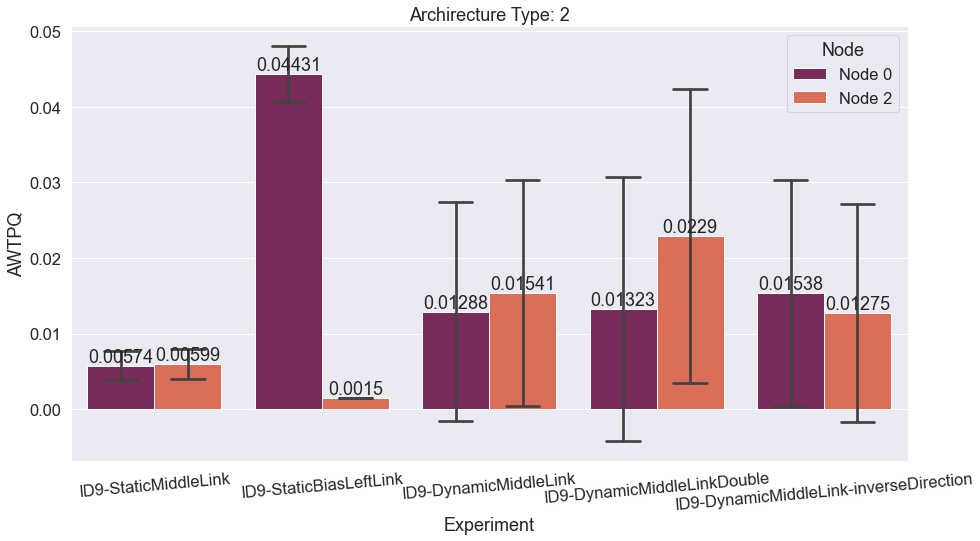

In [21]:
plt.figure(figsize = (15,8))
sns.set(font_scale = 1.5)
ax = sns.barplot(data=dataset_architecture2, x='Experiment', y='AWTPQ', hue='Node', ci='sd',palette="rocket" ,capsize=0.2)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 5)
#ax.set_ylim(0, 0.005)
ax.set_title('Archirecture Type: 2')
plt.savefig('exp_id9/exp_id9_architype2_loss_10repeated.png')

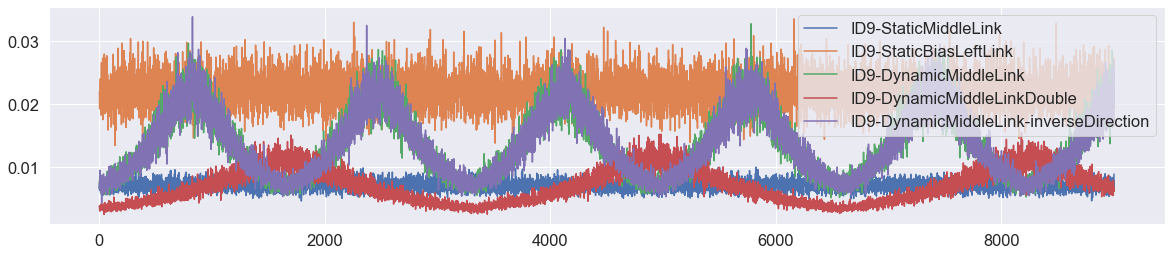

In [22]:
df = dataset_architecture2
plt.figure(figsize = (20,4))
for name in exp_names:
    time_diff_list = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')]['Time'].diff()
    
    plt.plot(time_diff_list.to_list()[1:], label=name)
plt.legend()
plt.savefig('exp_id9/exp_id9_architype2_time_diff_loss_10repeated.png')

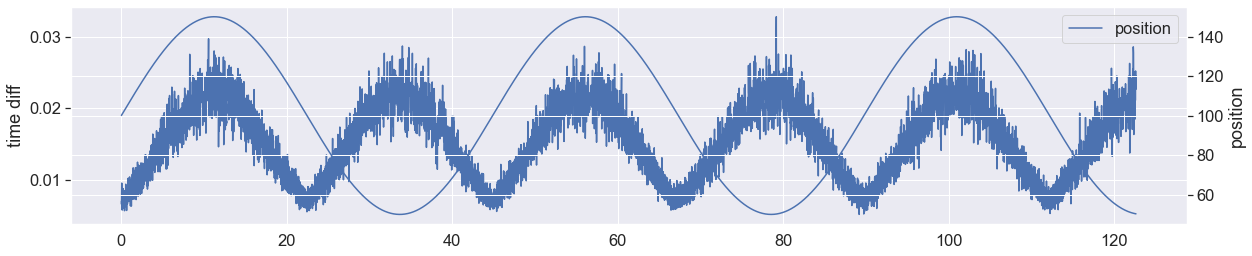

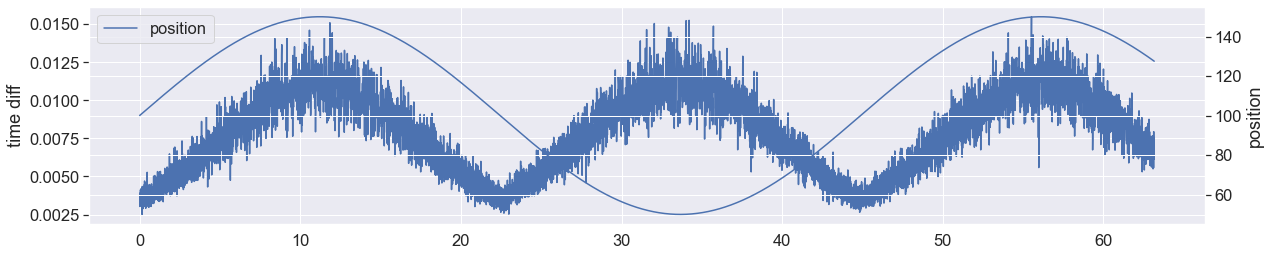

In [19]:
df = dataset_architecture2

for name in ['ID9-DynamicMiddleLink', 'ID9-DynamicMiddleLinkDouble']: # exp_names
    time_stamp = np.array(df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')]['Time'].to_list())
    coordinate_x = time_to_coordinate(time_stamp)[0]
    time_diff_list = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')]['Time'].diff()
    fig,ax = plt.subplots(figsize = (20,4))
    ax.plot(time_stamp[1:], time_diff_list.to_list()[1:], label='time diff')
    ax.set_ylabel('time diff')
    ax2=ax.twinx()
    ax2.plot(time_stamp, coordinate_x, label='position')
    ax2.set_ylabel('position')
    plt.legend()

In [20]:
time_stamp

array([7.17036519e-03, 1.08206324e-02, 1.47206612e-02, ...,
       6.31454173e+01, 6.31521781e+01, 6.31583538e+01])

In [9]:
df = dataset_architecture2
dummy = []
for name in exp_names:
    first_mean = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].head(1).iloc[0]['Time']
    first_std = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].head(1).iloc[0]['STD']
    last_mean = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].tail(1).iloc[0]['Time']
    last_std = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].tail(1).iloc[0]['STD']
    #print(f'{name}: first: {first_mean} STD: {first_std}, last: {last_mean} STD: {last_std}')
    dummy.append([first_mean, first_std, last_mean, last_std])
    #print(f'{first_mean}\t{first_std}\t{last_mean}\t{last_std}')
np.savetxt('exp_id9/exp_id9_a2_loss.csv', np.array(dummy), delimiter=",")

<AxesSubplot:xlabel='AWTPQ', ylabel='Count'>

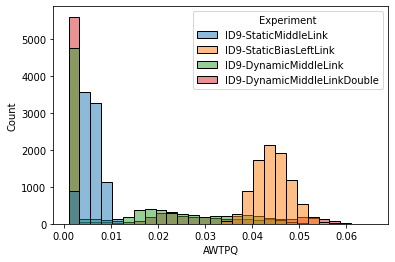

In [21]:
sns.histplot(data=df.loc[(df['Node'] == 'Node 0') & (df['Experiment'] != 'ID9-DynamicMiddleLink-inverseDirection')], x='AWTPQ', hue='Experiment')
#sns.histplot(data=df.loc[df['Node'] == 'Node 2'], x='AWTPQ', hue='Experiment')

In [24]:
arc = ['Architecture 2']*len(df)
df['Architecture'] = arc
df.to_csv('exp_id9/exp_id9_arch2_results_df.csv')